In [3]:
import os

print(os.getcwd())

/Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code/data


In [2]:
import numpy as np
import pandas as pd

In [2]:
# This string was taken from the features to monitor from the rl_sampler_1.sh script
featuresString = "alarmtimer:alarmtimer_fired,alarmtimer:alarmtimer_start,block:block_bio_backmerge,block:block_bio_remap,block:block_dirty_buffer,block:block_getrq,block:block_touch_buffer,block:block_unplug,cachefiles:cachefiles_create,cachefiles:cachefiles_lookup,cachefiles:cachefiles_mark_active,clk:clk_set_rate,cpu-migrations,cs,dma_fence:dma_fence_init,fib:fib_table_lookup,filemap:mm_filemap_add_to_page_cache,gpio:gpio_value,ipi:ipi_raise,irq:irq_handler_entry,irq:softirq_entry,jbd2:jbd2_handle_start,jbd2:jbd2_start_commit,kmem:kfree,kmem:kmalloc,kmem:kmem_cache_alloc,kmem:kmem_cache_free,kmem:mm_page_alloc,kmem:mm_page_alloc_zone_locked,kmem:mm_page_free,kmem:mm_page_pcpu_drain,mmc:mmc_request_start,net:net_dev_queue,net:net_dev_xmit,net:netif_rx,page-faults,pagemap:mm_lru_insertion,preemptirq:irq_enable,qdisc:qdisc_dequeue,random:get_random_bytes,random:mix_pool_bytes_nolock,random:urandom_read,raw_syscalls:sys_enter,raw_syscalls:sys_exit,rpm:rpm_resume,rpm:rpm_suspend,sched:sched_process_exec,sched:sched_process_free,sched:sched_process_wait,sched:sched_switch,sched:sched_wakeup,signal:signal_deliver,signal:signal_generate,skb:consume_skb,skb:kfree_skb,skb:skb_copy_datagram_iovec,sock:inet_sock_set_state,task:task_newtask,tcp:tcp_destroy_sock,tcp:tcp_probe,timer:hrtimer_start,timer:timer_start,udp:udp_fail_queue_rcv_skb,workqueue:workqueue_activate_work,writeback:global_dirty_state,writeback:sb_clear_inode_writeback,writeback:wbc_writepage,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_enqueue,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,writeback:writeback_pages_written,writeback:writeback_single_inode,writeback:writeback_write_inode,writeback:writeback_written"
featuresArray = featuresString.split(",")
print(featuresArray)
print("Number of features: {}".format(len(featuresArray)))

['alarmtimer:alarmtimer_fired', 'alarmtimer:alarmtimer_start', 'block:block_bio_backmerge', 'block:block_bio_remap', 'block:block_dirty_buffer', 'block:block_getrq', 'block:block_touch_buffer', 'block:block_unplug', 'cachefiles:cachefiles_create', 'cachefiles:cachefiles_lookup', 'cachefiles:cachefiles_mark_active', 'clk:clk_set_rate', 'cpu-migrations', 'cs', 'dma_fence:dma_fence_init', 'fib:fib_table_lookup', 'filemap:mm_filemap_add_to_page_cache', 'gpio:gpio_value', 'ipi:ipi_raise', 'irq:irq_handler_entry', 'irq:softirq_entry', 'jbd2:jbd2_handle_start', 'jbd2:jbd2_start_commit', 'kmem:kfree', 'kmem:kmalloc', 'kmem:kmem_cache_alloc', 'kmem:kmem_cache_free', 'kmem:mm_page_alloc', 'kmem:mm_page_alloc_zone_locked', 'kmem:mm_page_free', 'kmem:mm_page_pcpu_drain', 'mmc:mmc_request_start', 'net:net_dev_queue', 'net:net_dev_xmit', 'net:netif_rx', 'page-faults', 'pagemap:mm_lru_insertion', 'preemptirq:irq_enable', 'qdisc:qdisc_dequeue', 'random:get_random_bytes', 'random:mix_pool_bytes_nolock'

In [3]:
for feature in featuresArray:
    print(feature)

alarmtimer:alarmtimer_fired
alarmtimer:alarmtimer_start
block:block_bio_backmerge
block:block_bio_remap
block:block_dirty_buffer
block:block_getrq
block:block_touch_buffer
block:block_unplug
cachefiles:cachefiles_create
cachefiles:cachefiles_lookup
cachefiles:cachefiles_mark_active
clk:clk_set_rate
cpu-migrations
cs
dma_fence:dma_fence_init
fib:fib_table_lookup
filemap:mm_filemap_add_to_page_cache
gpio:gpio_value
ipi:ipi_raise
irq:irq_handler_entry
irq:softirq_entry
jbd2:jbd2_handle_start
jbd2:jbd2_start_commit
kmem:kfree
kmem:kmalloc
kmem:kmem_cache_alloc
kmem:kmem_cache_free
kmem:mm_page_alloc
kmem:mm_page_alloc_zone_locked
kmem:mm_page_free
kmem:mm_page_pcpu_drain
mmc:mmc_request_start
net:net_dev_queue
net:net_dev_xmit
net:netif_rx
page-faults
pagemap:mm_lru_insertion
preemptirq:irq_enable
qdisc:qdisc_dequeue
random:get_random_bytes
random:mix_pool_bytes_nolock
random:urandom_read
raw_syscalls:sys_enter
raw_syscalls:sys_exit
rpm:rpm_resume
rpm:rpm_suspend
sched:sched_process_exec
s

In [5]:
print(len(featuresArray))

75


# Data Exploration

## Afterstates Online Agent

In [8]:
dataset1 = pd.read_csv("afterstates_online_agent/cnc_backdoor_jakoritar_as_changeip_nohup_client_online_samples_2_2022-08-24-14-41_5s.csv")
dataset1.head(5)

,time,timestamp,seconds,connectivity,cpuUser,cpuSystem,cpuNice,cpuIdle,cpuIowait,cpuHardIrq,...,writeback:sb_clear_inode_writeback,writeback:wbc_writepage,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_enqueue,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,writeback:writeback_pages_written,writeback:writeback_single_inode,writeback:writeback_write_inode,writeback:writeback_written
0,5.01232,1661344893173,5.012318,1,4.4,29.8,0.0,65.8,0.0,0.0,...,0,0,32,1,7,39,1,0,0,1
1,10.02570,1661344899941,5.013338,1,2.6,35.0,0.0,62.1,0.0,0.0,...,0,0,12,0,0,12,1,0,0,1
2,15.03950,1661344906926,5.013777,1,3.1,29.2,0.0,67.7,0.0,0.0,...,0,0,53,0,0,53,1,0,0,1
3,20.05250,1661344913751,5.012994,1,2.5,23.7,0.0,73.8,0.0,0.0,...,0,0,38,0,0,38,1,0,0,1
4,25.06550,1661344920531,5.012990,1,3.3,23.8,0.0,72.1,0.0,0.0,...,0,0,29,0,0,29,1,1,1,2


In [9]:
print(dataset1.shape)

(2024, 100)


In [97]:
# import required module
import os
from fast_ml.feature_selection import get_constant_features
 
directories = ["test", "raw_behaviors_no_agent_rp4", "raw_behaviors_no_agent_rp3", "decision_states_online_agent", "afterstates_online_agent"]
constant_feature_sets = []
for directory in directories:
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            dataset = pd.read_csv(f)
            constant_features = set(get_constant_features(dataset, threshold=0.99, dropna=False)['Var'])
            constant_feature_sets.append(constant_features)

consistently_constant_features = list(constant_feature_sets[0].intersection(*constant_feature_sets))
consistently_constant_features.sort() 
print(len(consistently_constant_features))
for consistently_constant_feature in consistently_constant_features:
    print(consistently_constant_feature)

11
alarmtimer:alarmtimer_fired
alarmtimer:alarmtimer_start
cachefiles:cachefiles_create
cachefiles:cachefiles_lookup
cachefiles:cachefiles_mark_active
connectivity
cpuHardIrq
cpuNice
dma_fence:dma_fence_init
tasksStopped
udp:udp_fail_queue_rcv_skb


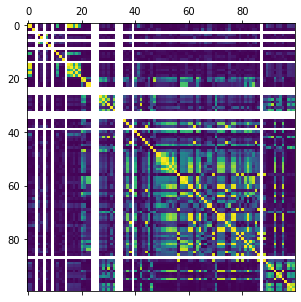

In [102]:
import matplotlib.pyplot as plt

import pandas as pd

# load dataset

#df = pd.read_csv('dataset.csv')

# calculate correlation matrix

corr_matrix = dataset1.corr().abs()

# print correlation matrix

#print(corr_matrix)
plt.matshow(corr_matrix)
plt.show()

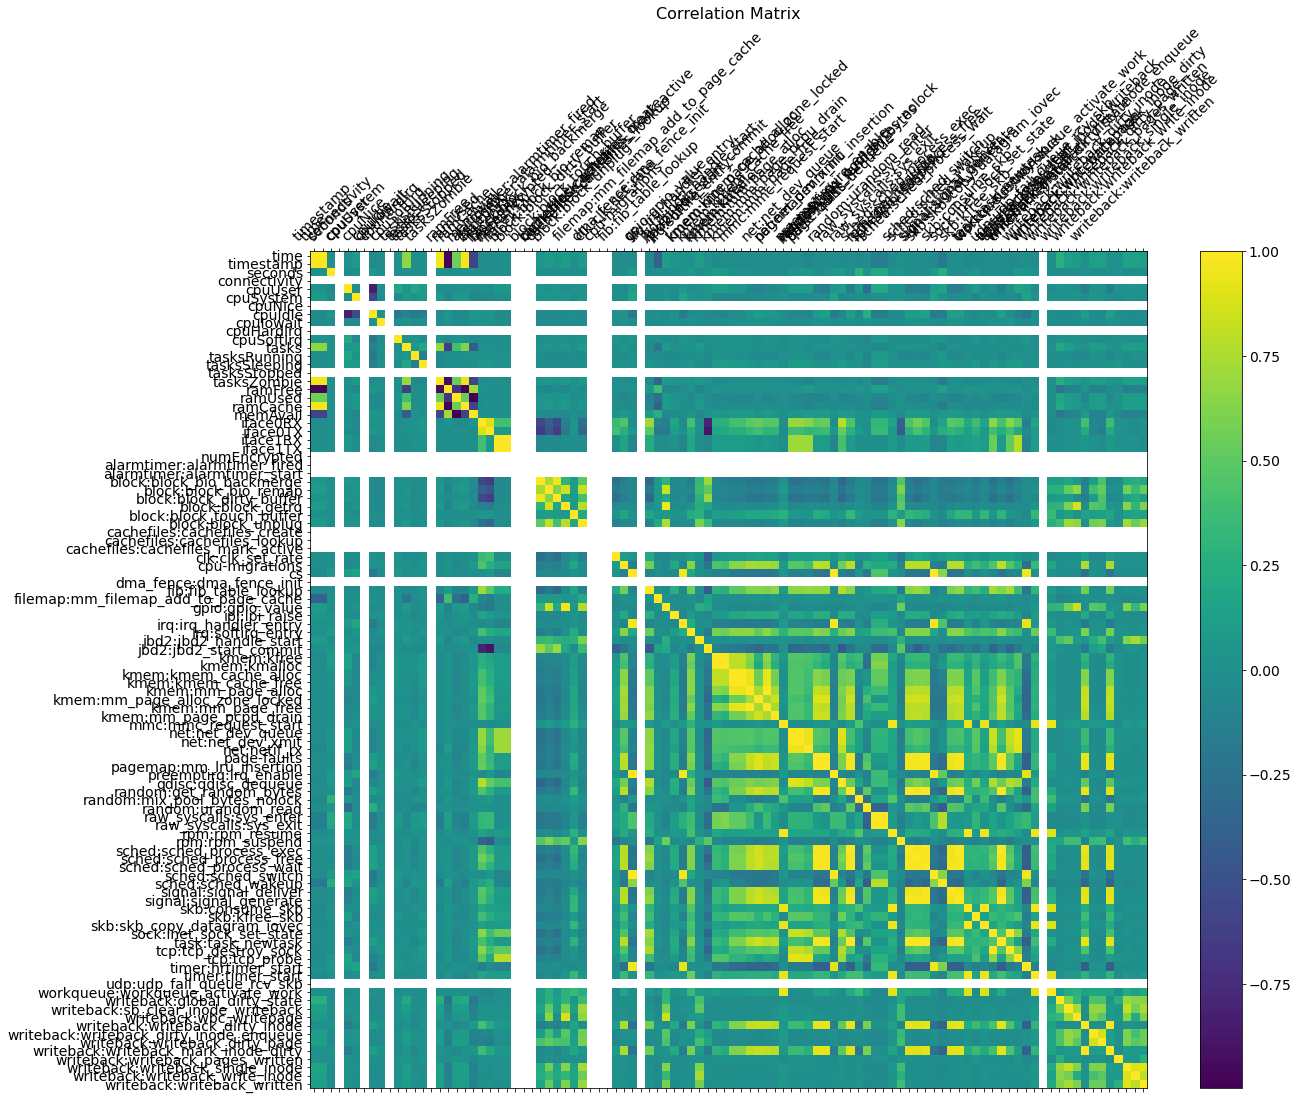

In [103]:
df = dataset1
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [1]:
# get upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find features with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
print(len(to_drop))

NameError: name 'corr_matrix' is not defined

In [114]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)
print(to_drop)

['timestamp', 'tasksZombie', 'ramFree', 'ramCache', 'memAvail', 'iface1TX', 'gpio:gpio_value', 'irq:irq_handler_entry', 'kmem:kmalloc', 'kmem:kmem_cache_free', 'kmem:mm_page_free', 'net:net_dev_xmit', 'pagemap:mm_lru_insertion', 'preemptirq:irq_enable', 'random:get_random_bytes', 'raw_syscalls:sys_exit', 'rpm:rpm_resume', 'sched:sched_process_exec', 'sched:sched_process_free', 'sched:sched_process_wait', 'sched:sched_switch', 'signal:signal_deliver', 'signal:signal_generate', 'skb:consume_skb', 'skb:skb_copy_datagram_iovec', 'task:task_newtask', 'tcp:tcp_destroy_sock', 'timer:hrtimer_start', 'timer:timer_start', 'writeback:writeback_mark_inode_dirty']


In [118]:
df.corr().head(100)

,time,timestamp,seconds,connectivity,cpuUser,cpuSystem,cpuNice,cpuIdle,cpuIowait,cpuHardIrq,...,writeback:sb_clear_inode_writeback,writeback:wbc_writepage,writeback:writeback_dirty_inode,writeback:writeback_dirty_inode_enqueue,writeback:writeback_dirty_page,writeback:writeback_mark_inode_dirty,writeback:writeback_pages_written,writeback:writeback_single_inode,writeback:writeback_write_inode,writeback:writeback_written
time,1.000000,0.999999,0.003064,NaN,0.014124,0.072886,NaN,-0.053622,-0.022169,NaN,...,0.139348,0.090824,0.004831,0.115583,0.140307,0.024119,0.016102,0.161386,0.145230,0.125253
timestamp,0.999999,1.000000,0.003088,NaN,0.014132,0.072964,NaN,-0.053671,-0.022153,NaN,...,0.139254,0.090743,0.004814,0.115531,0.140254,0.024096,0.016107,0.161294,0.145163,0.125182
seconds,0.003064,0.003088,1.000000,NaN,-0.044632,-0.011701,NaN,0.044493,0.000270,NaN,...,-0.010184,-0.020936,0.014007,-0.015988,-0.024517,0.010928,0.014488,-0.026553,-0.023093,-0.025743
connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpuUser,0.014124,0.014132,-0.044632,NaN,1.000000,-0.002111,NaN,-0.829564,-0.000007,NaN,...,0.030224,-0.002049,-0.146518,0.012071,0.027562,-0.142926,0.023065,0.027812,0.032722,0.023212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
writeback:writeback_mark_inode_dirty,0.024119,0.024096,0.010928,NaN,-0.142926,-0.019143,NaN,0.128031,0.023635,NaN,...,0.096813,0.071745,0.989851,0.119726,0.120424,1.000000,-0.006222,0.099279,0.083122,0.087313
writeback:writeback_pages_written,0.016102,0.016107,0.014488,NaN,0.023065,-0.034362,NaN,-0.000397,0.003721,NaN,...,0.061510,0.060228,-0.008869,0.028745,0.018519,-0.006222,1.000000,0.075977,0.069401,0.274509
writeback:writeback_single_inode,0.161386,0.161294,-0.026553,NaN,0.027812,0.017580,NaN,-0.033783,-0.019321,NaN,...,0.826564,0.635284,0.013340,0.602001,0.612054,0.099279,0.075977,1.000000,0.892544,0.909313
writeback:writeback_write_inode,0.145230,0.145163,-0.023093,NaN,0.032722,0.007015,NaN,-0.031329,-0.016602,NaN,...,0.584742,0.233264,0.014246,0.403421,0.488999,0.083122,0.069401,0.892544,1.000000,0.799269


In [135]:
correlation_matrix = df.corr()
correlations = {}
for this_feature in correlation_matrix:
    #print(row)
    correlations[this_feature] = []
    #print(corr_matrix[row])
    #for column in corr_matrix[row]:
    for other_feature, feature_correlation in correlation_matrix[this_feature].iteritems():
        #print(column)
        if this_feature == other_feature:
            continue
        
        if feature_correlation > 0.95:
            correlations[this_feature].append(other_feature)
    #print(type(corr_matrix[row]))
    
for this_feature, correlated_features in correlations.items():
    print(f"{this_feature} => {correlated_features}")

time => ['timestamp', 'tasksZombie', 'ramCache']
timestamp => ['time', 'tasksZombie', 'ramCache']
seconds => []
connectivity => []
cpuUser => []
cpuSystem => []
cpuNice => []
cpuIdle => []
cpuIowait => []
cpuHardIrq => []
cpuSoftIrq => []
tasks => []
tasksRunning => []
tasksSleeping => []
tasksStopped => []
tasksZombie => ['time', 'timestamp']
ramFree => []
ramUsed => []
ramCache => ['time', 'timestamp']
memAvail => []
iface0RX => []
iface0TX => []
iface1RX => ['iface1TX']
iface1TX => ['iface1RX']
numEncrypted => []
alarmtimer:alarmtimer_fired => []
alarmtimer:alarmtimer_start => []
block:block_bio_backmerge => []
block:block_bio_remap => []
block:block_dirty_buffer => []
block:block_getrq => ['gpio:gpio_value']
block:block_touch_buffer => []
block:block_unplug => []
cachefiles:cachefiles_create => []
cachefiles:cachefiles_lookup => []
cachefiles:cachefiles_mark_active => []
clk:clk_set_rate => []
cpu-migrations => []
cs => ['irq:irq_handler_entry', 'preemptirq:irq_enable', 'sched:sche

/var/folders/8v/42fl0kws5cs5j84mbf8mbhbh0000gn/T/ipykernel_7049/1099940770.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for other_feature, feature_correlation in correlation_matrix[this_feature].iteritems():


In [10]:
print(dataset1.columns)

Index(['time', 'timestamp', 'seconds', 'connectivity', 'cpuUser', 'cpuSystem',
       'cpuNice', 'cpuIdle', 'cpuIowait', 'cpuHardIrq', 'cpuSoftIrq', 'tasks',
       'tasksRunning', 'tasksSleeping', 'tasksStopped', 'tasksZombie',
       'ramFree', 'ramUsed', 'ramCache', 'memAvail', 'iface0RX', 'iface0TX',
       'iface1RX', 'iface1TX', 'numEncrypted', 'alarmtimer:alarmtimer_fired',
       'alarmtimer:alarmtimer_start', 'block:block_bio_backmerge',
       'block:block_bio_remap', 'block:block_dirty_buffer',
       'block:block_getrq', 'block:block_touch_buffer', 'block:block_unplug',
       'cachefiles:cachefiles_create', 'cachefiles:cachefiles_lookup',
       'cachefiles:cachefiles_mark_active', 'clk:clk_set_rate',
       'cpu-migrations', 'cs', 'dma_fence:dma_fence_init',
       'fib:fib_table_lookup', 'filemap:mm_filemap_add_to_page_cache',
       'gpio:gpio_value', 'ipi:ipi_raise', 'irq:irq_handler_entry',
       'irq:softirq_entry', 'jbd2:jbd2_handle_start', 'jbd2:jbd2_start_commit'

In [20]:
test = "abcdedfgh"
test.split(":")[0]

'abcdedfgh'

In [30]:
for column in dataset1.columns:
    column_name = column.replace("_", "\_")
    splitted_column_name = column_name.split(":")
    if len(splitted_column_name) == 2:
        event_source = splitted_column_name[0]
        event = splitted_column_name[1]
    else:
        event_source = ""
        event = splitted_column_name[0]
    event 
    print(f"{event} & {event_source} & s & c & e & f \\\\")

time &  & s & c & e & f \\
timestamp &  & s & c & e & f \\
seconds &  & s & c & e & f \\
connectivity &  & s & c & e & f \\
cpuUser &  & s & c & e & f \\
cpuSystem &  & s & c & e & f \\
cpuNice &  & s & c & e & f \\
cpuIdle &  & s & c & e & f \\
cpuIowait &  & s & c & e & f \\
cpuHardIrq &  & s & c & e & f \\
cpuSoftIrq &  & s & c & e & f \\
tasks &  & s & c & e & f \\
tasksRunning &  & s & c & e & f \\
tasksSleeping &  & s & c & e & f \\
tasksStopped &  & s & c & e & f \\
tasksZombie &  & s & c & e & f \\
ramFree &  & s & c & e & f \\
ramUsed &  & s & c & e & f \\
ramCache &  & s & c & e & f \\
memAvail &  & s & c & e & f \\
iface0RX &  & s & c & e & f \\
iface0TX &  & s & c & e & f \\
iface1RX &  & s & c & e & f \\
iface1TX &  & s & c & e & f \\
numEncrypted &  & s & c & e & f \\
alarmtimer\_fired & alarmtimer & s & c & e & f \\
alarmtimer\_start & alarmtimer & s & c & e & f \\
block\_bio\_backmerge & block & s & c & e & f \\
block\_bio\_remap & block & s & c & e & f \\
block\_dirty\

In [20]:
print(len(dataset1.columns))

100


## Decision States Online Agent

In [9]:
dataset2 = pd.read_csv("decision_states_online_agent/cnc_backdoor_jakoritar_good_noexpfs_online_samples_1_2022-08-22-09-09_5s")
dataset2.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'decision_states_online_agent/cnc_backdoor_jakoritar_good_noexpfs_online_samples_1_2022-08-22-09-09_5s'

In [10]:
print(dataset2.columns)

Index(['time', 'timestamp', 'seconds', 'connectivity', 'cpuUser', 'cpuSystem',
       'cpuNice', 'cpuIdle', 'cpuIowait', 'cpuHardIrq', 'cpuSoftIrq', 'tasks',
       'tasksRunning', 'tasksSleeping', 'tasksStopped', 'tasksZombie',
       'ramFree', 'ramUsed', 'ramCache', 'memAvail', 'iface0RX', 'iface0TX',
       'iface1RX', 'iface1TX', 'numEncrypted', 'alarmtimer:alarmtimer_fired',
       'alarmtimer:alarmtimer_start', 'block:block_bio_backmerge',
       'block:block_bio_remap', 'block:block_dirty_buffer',
       'block:block_getrq', 'block:block_touch_buffer', 'block:block_unplug',
       'cachefiles:cachefiles_create', 'cachefiles:cachefiles_lookup',
       'cachefiles:cachefiles_mark_active', 'clk:clk_set_rate',
       'cpu-migrations', 'cs', 'dma_fence:dma_fence_init',
       'fib:fib_table_lookup', 'filemap:mm_filemap_add_to_page_cache',
       'gpio:gpio_value', 'ipi:ipi_raise', 'irq:irq_handler_entry',
       'irq:softirq_entry', 'jbd2:jbd2_handle_start', 'jbd2:jbd2_start_commit'

In [14]:
print(len(dataset2.columns))

100
